In [1]:
from google.colab import drive
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:

data_file = "https://raw.githubusercontent.com/ApollocreedXI/MESA-8410-Final-Project/refs/heads/main/treatment_groups.csv"

treatment_groups_df = pd.read_csv(data_file, parse_dates= ["month"])

In [3]:
treatment_groups_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Unnamed: 0              1560 non-null   int64         
 1   month                   1560 non-null   datetime64[ns]
 2   fir_overall_count       1560 non-null   int64         
 3   fir_caw_count           1560 non-null   int64         
 4   fir_bywomen_count       1560 non-null   int64         
 5   arrest_count            1560 non-null   int64         
 6   dir_count               1560 non-null   int64         
 7   ncr_count               1560 non-null   int64         
 8   ps_code                 1560 non-null   float64       
 9   urban                   1560 non-null   object        
 10  dist_urban              1560 non-null   float64       
 11  treatment               1560 non-null   object        
 12  implement_quality       1560 non-null   float64 

In [4]:
treatment_groups_df = treatment_groups_df.drop(columns = "Unnamed: 0")

We will try to predict whether or not police station is a Women_WHS or not. I will utilze the following variables to acomplish this:

*   FIR CAW count
*   FIR by women count

I have learned in my exploratory data analysis that these variables are positively correlated with Women_WHD. Additionally, I learned that there is a significant difference in the average FIR CAW count from the two treatment arms.


In [5]:
#split the predictor and outcome variables
#Want to ensure I remove variables such as PS that could identify the Women_WHD

X = treatment_groups_df[["fir_bywomen_count", "fir_caw_count"]]

y = treatment_groups_df["women_whd"]

print("The shape of X:", X.shape," ", "The shape of y:", y.shape)

The shape of X: (1560, 2)   The shape of y: (1560,)


#Splitting the data

In [6]:
#importing the function train_test_split from scikit-learn

from sklearn.model_selection import train_test_split

#split the data into training and testing partitions

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.20, random_state = 777,)

#Building and training the model
###No normalization is needed as the predictor variables are counts

In [7]:
from sklearn.linear_model import LogisticRegression

#create an instance of the LogisticRegression class

model = LogisticRegression(random_state= 777)

#train the model on the training data

model.fit(X_train, y_train)

LogisticRegression(random_state=777)

##Using our model to predict on our test data

In [8]:
predictions = model.predict(X_test)

predictions

array([0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1.,
       1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1.,
       0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 1.

In [9]:
#View actual results for outcome variable

y_test.value_counts()

,count
women_whd,
0.0,160
1.0,152


In [10]:
unique, counts = np.unique(predictions, return_counts= True)

print(np.asarray((unique, counts)).T)

[[  0. 212.]
 [  1. 100.]]


Looking at ther raw outputs it does look like our model predictions are not similar to the distribution of the y_test

#Let's create a confusion matrix to analyze the results

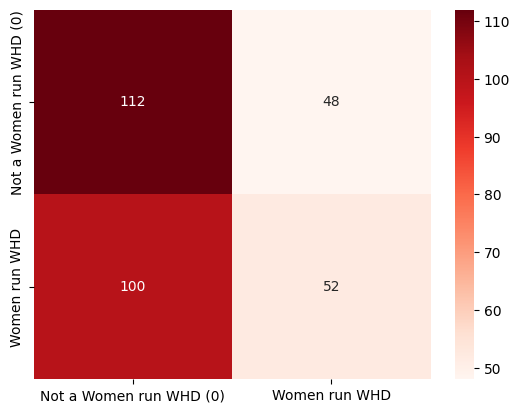

In [11]:
from sklearn.metrics import confusion_matrix

class_names = ["Not a Women run WHD (0)", "Women run WHD"]

_=sns.heatmap(
    confusion_matrix(y_test, predictions),
    annot = True,
    fmt="g",
    cmap= "Reds",
    xticklabels=class_names,
    yticklabels= class_names
)



In [12]:
#import classification_report

from sklearn.metrics import classification_report

#create the classifcation report
class_names = ["Not a Women run WHD (0)", "Women run WHD(1)"]
print(classification_report(y_test, predictions, target_names = class_names))



                         precision    recall  f1-score   support

Not a Women run WHD (0)       0.53      0.70      0.60       160
       Women run WHD(1)       0.52      0.34      0.41       152

               accuracy                           0.53       312
              macro avg       0.52      0.52      0.51       312
           weighted avg       0.52      0.53      0.51       312



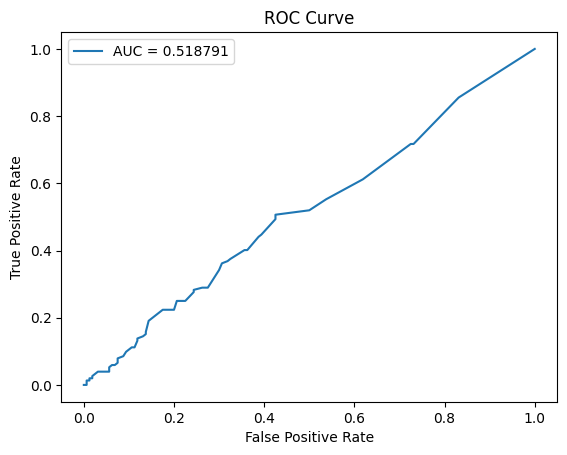

In [13]:
from sklearn import metrics

#predict the probabilities of the test data
y_pred_probablity = model.predict_proba(X_test)[::, 1]

#compute the false positve rate and true positve rate

false_pos_rate, true_pos_rate, _ = metrics.roc_curve(y_test, y_pred_probablity)

#AUC scores

auc = metrics.roc_auc_score(y_test, y_pred_probablity)

_ = plt.plot(false_pos_rate, true_pos_rate, label = "AUC = " + "%2f" % auc)

_ = plt.title('ROC Curve')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.legend(loc='best')

 Digging in deeper the confusion matrix does not show promising results. The models precision, a models true positive predictions, is 53%. The recall is very poor, showing that when it predicts a positive class there is a high chance that it is false. When we look at the ROC curve we see that the AUC is 0.51. This illustrates that the model is no better than guessing.


